In [ ]:
using_colab = True

In [ ]:
if using_colab:

    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/Pc_Results.xlsx'
    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/Mode.png'
    #!wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/photos.ZIP'

    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx

    #!pip install altair
    #!pip install panel
    #!pip install pillow
    !pip install jupyter_bokeh

    #!unzip photos


# Reservoir Characterization: Capillary Pressure and Rock Typing

## Interrogation of the Core Calibration data used in this Carbonate Reservoir Characterization Workflow to Petrophysical Rock Types (PRT)

Interrogate Rosetta Stone core calibration data using Python's Altair to create interactive plots, cross plots and histograms. Altair is one of the best interactive software python libraries that allows the user to select data from an assortment of plots and observe the selected data on other depth plots, cross plots and histograms using your own user-defined layout.


---
## The Theory:
### Using Clerke’s Arab D Rosetta Stone data with Clerke’s Petrophysical Rock Types (PRT) to compare to Winland r35 and Amaefule RQI and FZI

From Clerke’s Rosetta Stone Arab D carbonate dataset most macro rock typically has a dual porosity system as indicated by the Pore Throat Distribution (PTD) that has two modes as shown below: 

![Mode.png](Mode.png)

The macro portion of the rock will have a mode greater than 2 microns with a second (or third) mode less than 2 microns for the other pore systems. Probably the most abundant PRT is the M_1. This is a macro-porous rock with a mode in the macro portion of the PTD and a second mode in the meso-porosity range. In this M_1 PRT, both the macro pores and meso-porous grains can contain oil saturations once the reservoir capillary pressure is great enough to drive out the water. The M_2 PRT is also a macro porous rock, but the second pore system is micro-porous and is too tight to have hydrocarbon saturations. 


### Petrophysical Rock Typing (PRT):

**One of the benefits of working with Thomeer parameters is that the exact mode of the PTD (radius) can be calculated for each sample using the Buiting Mode equation as shown below:**

        Mode(microns) = (exp(-1.15 * G) * (214/Pd))/2
        
The above equation gives us the mode of the pore system, and we normally only calculate the mode for the largest pore system for the sample. 

In the Altair plots below, the first row of porosity-permeability cross plots shows the PRT on the left and actual Mode of Pore Throats on the Z or color axis on the right. The second row of cross plots show the Winland r35, Amaefule FZI and RQI on the color axis.

In Rock Typing Winland’s r35 and Amaefule's FZI or RQI attempt to predict the most dominant pore throat. With our Rosetta Stone dataset, the dual-porosity carbonates indicate that Winland's r35 is usually close to the actual mode of the PTD, but FZI and RQI are much lower in values.

Windland's r35 is calculated:

        r35(microns) = 10**(0.732 + 0.588*log(Permeability) - 0.864*log(Porosity*100))


Amaefule-Kersey FZI is calculated:

        RQI(microns) = 0.0314 * sqrt(Permeability/Porosity)
        
        Phiz = Porosity / (1 - Porosity)

        FZI(microns) = RQI / Phiz
    
where Porosity is a volume fraction and not percent. 

On this dataset it appears that r35 has the best match to the actual mode of the Pore Throat Distribution from the Buiting Mode equation. The bimodality in the macro-porous rock has FZI falling between the two modes since FZI is the mean pore throat radius. Windland's r35 does a fairly good job of estimating the most dominant pore throat in this Rosetta Stone Calibration dataset.  


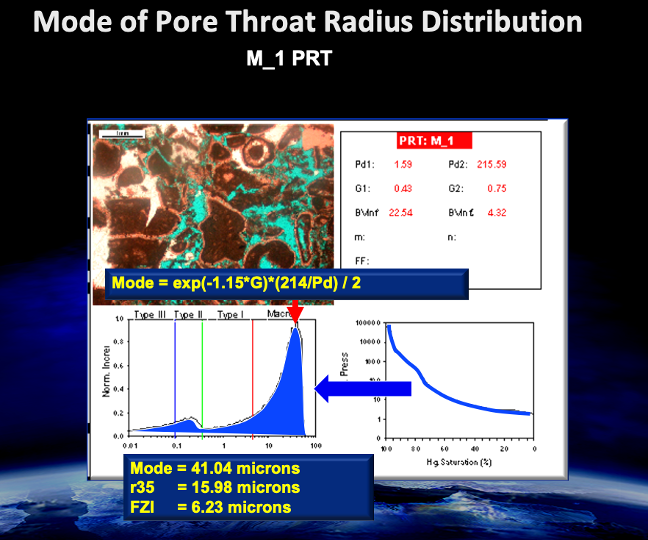

---
---

## Python Requirements:

In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
import altair as alt

import altair_transform
alt.data_transformers.disable_max_rows()



DataTransformerRegistry.enable('default')

---
# Example of viewing Capillary Pressure (Pc) Curves and Thomeer Pc Parameters according to the sample's position in Poro-Perm Space:

**This eample gives us an idea of the magnitude of the Thomeer parameters from a narrow range of selected samples from the porosity-permeability cross plot. In our proposed workflow we actually estimate the appropriate Thomeer parameters with kNN using 3-5 nearest neighbors, but the following plot gives us a visualization of appropriate Thomeer parameters for a selected group of samples.**

### First Import Capillary Pressure Curves with Thomeer Parameters from a core database from Excel Reference File:

In [2]:
#read the file
file = r'Pc_Results.xlsx'
df = pd.read_excel(file,index_col=False)

In [3]:
df.head()

,Depth,Sample,Permeability,lPerm,Porosity,PRT,ROCK_INDEX,G1,PD1,G2,...,Mode,lMode,Reference_Set,Pc,lPc,BVOCC,lBVOCC,dBv,Microns,lMicrons
0,1,1,1007.0,3.003029,0.23883,M_1,1,1.02,1.1,0.45,...,30.099804,1.478564,Rosetta,1.61,0.206826,0.042171,-1.374982,0.000000,131.677019,2.11951
1,2,1,1007.0,3.003029,0.23883,M_1,1,1.02,1.1,0.45,...,30.099804,1.478564,Rosetta,3.22,0.507856,2.196159,0.341664,2.153988,65.838509,1.81848
2,3,1,1007.0,3.003029,0.23883,M_1,1,1.02,1.1,0.45,...,30.099804,1.478564,Rosetta,6.44,0.808886,5.173410,0.713777,2.977251,32.919255,1.51745
3,4,1,1007.0,3.003029,0.23883,M_1,1,1.02,1.1,0.45,...,30.099804,1.478564,Rosetta,12.88,1.109916,7.520490,0.876246,2.347080,16.459627,1.21642
4,5,1,1007.0,3.003029,0.23883,M_1,1,1.02,1.1,0.45,...,30.099804,1.478564,Rosetta,25.76,1.410946,9.274642,0.967297,1.754152,8.229814,0.91539


In [5]:
interval = alt.selection_interval()

base = alt.Chart(df).properties(
    width=300,
    height=375, 
).add_selection(interval)


#------------------------------------------------
#
#       Poro-Perm Cross Plot
#
#------------------------------------------------

kphi = alt.Chart(df).mark_point(filled=True, size=100).encode(
    #x='Porosity:Q',
    #y='lPerm:Q',

    alt.X('Porosity:Q',
        scale=alt.Scale(domain=(0, 0.35))
    ),    
    alt.Y('Permeability:Q',scale=alt.Scale(type='log', base=10,domain=(.0001, 10000))),
    #size='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),
                        scale=alt.Scale(
                        domain=[ 1,         2,         3,      4,      5,        6   ],
                        range =['cyan', 'dodgerblue','blue','yellow','orange','brown'])),
    tooltip='Mode:Q', 
).properties(
    width=400,
    height=500, 

    title='Porosity vs. Permeability Cross Plot (PRT on Color Axis)',
    selection=interval
)


#------------------------------------------------
#
#       Capillary Pressure Curves colored by PRT
#
#------------------------------------------------
pc = alt.Chart(df).mark_line(clip=True).encode(
    alt.X('BVOCC:Q',
        scale=alt.Scale(domain=(30, 0))
    ),    
    alt.Y('Pc:Q',scale=alt.Scale(type='log', base=10,domain=(1, 10000))),
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    tooltip='Mode:Q', 
    strokeDash='Sample:N',
).properties(
    title='Pc Curves with PRT on Color Axis (Upscaled Pc curve is thick Black Curve)',
    width=400,
    height=500, 
    
).transform_filter(
    interval
)

pc2 = alt.Chart(df).mark_line(clip=True,strokeWidth=6).encode(
    alt.X('BVOCC:Q', aggregate='mean',
          scale=alt.Scale(domain=(30, 0))
         ),
    alt.Y('Pc:Q',scale=alt.Scale(type='log', base=10,domain=(1, 10000))),
    color=alt.value('black'),
).properties(
    #title='Upscaled Pc Curve with PRT as Color Axis',
    width=400,
    height=500, 
    
).transform_filter(
    interval
)
    
#------------------------------------------------
#
#       Pore Throat Distributions
#
#------------------------------------------------
ptd2 = base.mark_line( clip=True).encode(
    alt.X('Microns:Q',
        scale=alt.Scale(type='log', base=10,domain=(.01, 100))
    ),    
    alt.Y('dBv:Q',
        scale=alt.Scale(domain=(0, 15))
    ),    
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    strokeDash='Sample:N',
).properties(
    title='Pore Throat Distribution (Microns)',
    width=400,
    height=125,
).transform_filter(
    interval
)


ptd2b = base.mark_line( clip=True).encode(
    alt.X('Microns:Q',
        scale=alt.Scale(type='log', base=10,domain=(.01, 100))
    ),    
    alt.Y('dBv:Q',aggregate='mean',
        scale=alt.Scale(domain=(0, 15))
    ),    
     color=alt.value('black'),
    #strokeDash='Sample:N',
).properties(
    title='Pore Throat Distribution (Microns)',
    width=400,
    height=125,
).transform_filter(
    interval
)



#------------------------------------------------
#
#       Various Other Plots and Histograms
#
#------------------------------------------------
hist_pd1 = alt.Chart(df).mark_bar(clip=True).encode(
    alt.X('PD1',scale=alt.Scale(type='log', base=10,domain=(1, 10000))),
    #x='rock_index:O',
    #y='lmode:Q',
    #y='count()',
    alt.Y('count()',scale=alt.Scale(domain=(0, 30))),    
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgreen'),scale=alt.Scale(scheme='rainbow')),
    #strokeDash='Sample:N'
).properties(
    title='Pd1 of Selected Samples',
    width=400,
    height=125,
    #selection=interval
).transform_filter(
    interval
)

hist_pd1b = alt.Chart(df).mark_bar(clip=True).encode(
    alt.X('PD1', aggregate='median', scale=alt.Scale(type='log', base=10,domain=(1, 10000))),
    #x='rock_index:O',
    #y='lmode:Q', 
    #y='count()',
    alt.Y('count()',scale=alt.Scale(domain=(0, 40))),
    color=alt.value('black'),
    #strokeDash='Sample:N'
).properties(
    title='Pd1 of Selected Samples',
    width=400,
    height=125,
    #selection=interval
).transform_filter(
    interval
)



hist_pd2 = alt.Chart(df).mark_bar(clip=True).encode(
    alt.X('PD2',scale=alt.Scale(type='log', base=10,domain=(1, 10000))),
    #x='rock_index:O',
    #y='lmode:Q',
    alt.Y('count()',scale=alt.Scale(domain=(0, 40))),
    #y='count()',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('green'),scale=alt.Scale(scheme='rainbow')),
    #strokeDash='Sample:N'
).properties(
    title='Pd2 of Selected Samples',
    width=400,
    height=125,
    #selection=interval
).transform_filter(
    interval
)


hist_pd2b = alt.Chart(df).mark_bar(clip=True).encode(
    alt.X('PD2', aggregate='median', scale=alt.Scale(type='log', base=10,domain=(1, 10000))),
    #x='rock_index:O',
    #y='lmode:Q',
    #y='count()',
    alt.Y('count()',scale=alt.Scale(domain=(0, 40))),
    color=alt.value('black'),
    #strokeDash='Sample:N'
).properties(
    title='Pd2 of Selected Samples',
    width=400,
    height=125,
    #selection=interval
).transform_filter(
    interval
)




hist_g1 = alt.Chart(df).mark_bar(clip=True).encode(
    alt.X('G1',scale=alt.Scale(domain=(0, 2))),
    #x='rock_index:O',
    #y='lmode:Q',
    #y='count()',
    alt.Y('count()',scale=alt.Scale(domain=(0, 40))),
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('orange'),scale=alt.Scale(scheme='rainbow')),
    #strokeDash='Sample:N'
).properties(
    title='G1 of Selected Samples',
    width=400,
    height=125,
    #selection=interval
).transform_filter(
    interval
)

hist_g1b = alt.Chart(df).mark_bar(clip=True).encode(
    alt.X('G1',aggregate='median',scale=alt.Scale(domain=(0, 2))),
    #x='rock_index:O',
    #y='lmode:Q',
    #y='count()',
    alt.Y('count()',scale=alt.Scale(domain=(0, 40))),
    color=alt.value('black'),
    #strokeDash='Sample:N'
).properties(
    title='G1 of Selected Samples',
    width=400,
    height=125,
    #selection=interval
).transform_filter(
    interval
)





hist_g2 = alt.Chart(df).mark_bar(clip=True).encode(
    alt.X('G2',scale=alt.Scale(domain=(0, 2))),
    #x='rock_index:O',
    #y='lmode:Q',
    #y='count()',
    alt.Y('count()',scale=alt.Scale(domain=(0, 40))),
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('brown'),scale=alt.Scale(scheme='rainbow')),
    #strokeDash='Sample:N'
).properties(
    title='G2 of Selected Samples',
    width=400,
    height=125,
    #selection=interval
).transform_filter(
    interval
)
hist_g2b = alt.Chart(df).mark_bar(clip=True).encode(
    alt.X('G2',aggregate='median',scale=alt.Scale(domain=(0, 2))),
    #x='rock_index:O',
    #y='lmode:Q',
    #y='count()',
    alt.Y('count()',scale=alt.Scale(domain=(0, 40))),
    color=alt.value('black'),
    #strokeDash='Sample:N'
).properties(
    title='G2 of Selected Samples',
    width=400,
    height=125,
    #selection=interval
).transform_filter(
    interval
)



hist_bv1 = alt.Chart(df).mark_bar(clip=True).encode(
    alt.X('BV1',scale=alt.Scale(domain=(0, 30))),
    #x='rock_index:O',
    #y='lmode:Q',
    y='count()',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('cyan'),scale=alt.Scale(scheme='rainbow')),
    #strokeDash='Sample:N'
).properties(
    title='BV1 of Selected Samples',
    width=400,
    height=125,
    #selection=interval
).transform_filter(
    interval
)

hist_bv2 = alt.Chart(df).mark_bar(clip=True).encode(
    alt.X('BV2',scale=alt.Scale(domain=(0, 30))),
    #x='rock_index:O',
    #y='lmode:Q',
    y='count()',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('blue'),scale=alt.Scale(scheme='rainbow')),
    #strokeDash='Sample:N'
).properties(
    title='BV2 of Selected Samples',
    width=400,
    height=125,
    #selection=interval
).transform_filter(
    interval
)

#------------------------------------------------
#
#       Define Plot Regions for Altair
#
#------------------------------------------------

kphihist = kphi | pc + pc2
poresys1 = hist_pd1 + hist_pd1b | hist_g1 + hist_g1b 
poresys2 = hist_pd2+hist_pd2b   | hist_g2 + hist_g2b 

plot = kphihist & poresys1 & ptd2 & poresys2 


plot



alt.VConcatChart(...)